In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Pathway to sqlite
database_path = "Resources/hawaii.sqlite"

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [10]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("The Query Date the year before:", query_date)

The Query Date the year before: 2016-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
p_data = pd.DataFrame(precipitation_data, columns = ["date", "prcp"])

# Sort the dataframe by date
p_data.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# Clean dataframe and drop NaN values
p_data = p_data.sort_values(by = 'date').dropna()
p_data.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


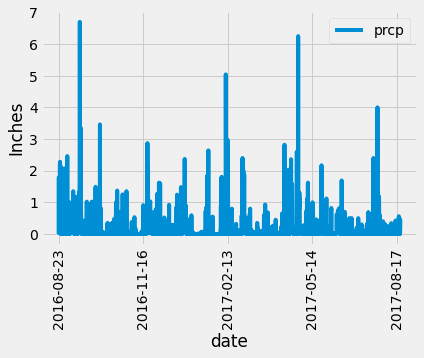

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
p_data.plot(rot=90)
plt.ylabel("Inches")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.id).count()
print(f'There are {stations} stations in this dataset')

There are 9 stations in this dataset


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = "USC00519281"
session.query(func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)).filter(Measurement.station == station).all()

[(54.0, 85.0, 71.66378066378067)]

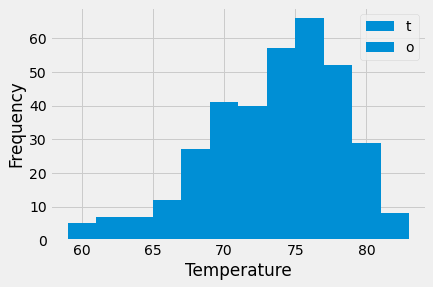

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").\
                    filter(Measurement.date > query_date).all()

# Create DataFrame
most_active = pd.DataFrame(most_active_station)
#most_active.head()

# Plot histogram
most_active.plot.hist(bins=12)
plt.legend("tobs")
plt.xlabel("Temperature")
plt.show()

# Close session

In [18]:
# Close Session
session.close()